# SOCF Evolution

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import csv

def Loading_CSV(filename, Headers = 2):
    file = open(filename)
    csvreader = csv.reader(file)
    for i in range(Headers):
        header = next(csvreader)
    rows = []
    for row in csvreader:
        rows.append(row)
    #print(rows[0])
    file.close()
    return rows

def Orgenized_Container(filename, Data_Points_num = 21):
    Container =[[],[],[]]
    Exposure = []
    rows = Loading_CSV(filename)
    # Data strucutre:
    #     Experiment Data
    #             Min, Max, Avg
    
    for i in range(0,Data_Points_num-1):
        Exposure.append(rows[i][1])
        Container[0].append(float(rows[i][4])-float(rows[i][2])) #Lower Error
        Container[1].append(float(rows[i][3])-float(rows[i][4])) #Upper Error
        Container[2].append(float(rows[i][4])) #Avg
    return Container, Exposure

def Orgenized_Container1(filename, Data_Points_num = 21):
    Container =[[],[],[]]
    Exposure = []
    rows = Loading_CSV(filename)
    # Data strucutre:
    #     Experiment Data
    #             Min, Max, Avg
    
    for i in range(0,Data_Points_num-1):
        Exposure.append(rows[i][1])
        Container[0].append(float(rows[i][8])) #Lower Error
        Container[1].append(float(rows[i][9])) #Upper Error
        Container[2].append(float(rows[i][10])) #Avg
    return Container, Exposure

def Plot4(Folder ,Exposure, Temporal_Raw, Temporal_BGR, Spatial_Raw, Spatial_BGR):
    
    # Defining the plotting framework
    fig, ax   = plt.subplots(2, 2)
    
    # Creating the Plots
    ax[0][0].errorbar(Exposure, Spatial_Raw[2], yerr=(Spatial_Raw[0],Spatial_Raw[1]), fmt='o',
                color='blue',ecolor='lightblue', elinewidth=3, capsize=0,        label='Spatial SOCF Raw');
    ax[0][1].errorbar(Exposure, Spatial_BGR[2], yerr=(Spatial_BGR[0],Spatial_BGR[1]), fmt='o',
                color='blue',ecolor='lightblue',  elinewidth=3, capsize=0, label='Spatial SOCF BGR');
    ax[1][0].errorbar(Exposure[1:], Temporal_Raw[2][1:], yerr=(Temporal_Raw[0][1:],Temporal_Raw[1][1:]),fmt='o',
                color='maroon',ecolor='lightcoral',  elinewidth=3, capsize=0,        label='Temproal SOCF Raw');
    ax[1][1].errorbar(Exposure[1:], Temporal_BGR[2][1:], yerr=(Temporal_BGR[0][1:],Temporal_BGR[1][1:]), fmt='o',
                color='maroon',ecolor='lightcoral', elinewidth=3, capsize=0, label='Temproal SOCF BGR');
    
    # Setting the legend place
    ax[0][0].legend(loc= 'upper right', fontsize=16)
    ax[0][1].legend(loc= 'upper right', fontsize=16)
    ax[1][0].legend(loc= 'upper right', fontsize=16)
    ax[1][1].legend(loc= 'upper right', fontsize=16)
    
    # Setting the x axis label
    ax[0][0].set_xlabel("Exposure us", fontsize=16)
    ax[0][1].set_xlabel("Exposure us", fontsize=16)
    ax[1][0].set_xlabel("Exposure Difference us", fontsize=16)
    ax[1][1].set_xlabel("Exposure Difference us", fontsize=16)
    
    # setting the y axis label
    ax[0][0].set_ylabel("2nd Order Correlation Function", fontsize=16)
    ax[0][1].set_ylabel("2nd Order Correlation Function", fontsize=16)
    ax[1][0].set_ylabel("2nd Order Correlation Function", fontsize=16)
    ax[1][1].set_ylabel("2nd Order Correlation Function", fontsize=16)
    
    # Drawing a horizontal line at y = 1 
    ax[0][0].axhline(y=1, color='black', linestyle='dashed')
    ax[0][1].axhline(y=1, color='black', linestyle='dashed')
    ax[1][0].axhline(y=1, color='black', linestyle='dashed')
    ax[1][1].axhline(y=1, color='black', linestyle='dashed')
    
    # Changing the font of the axis ticks
    ax[0][0].tick_params(labelsize=16)
    ax[1][0].tick_params(labelsize=16)
    ax[1][1].tick_params(labelsize=16)
    ax[0][1].tick_params(labelsize=16)
    
    # Setting the y Axis Limit
    ax[0][0].set_ylim(0.97)
    ax[1][0].set_ylim(0.97)
    ax[0][1].set_ylim(0.97)
    ax[1][1].set_ylim(0.97)
    
    # Setting the x Axis Limit
    ax[0][0].set_xlim(-1, len(Exposure))
    ax[1][0].set_xlim(-1, len(Exposure))
    ax[0][1].set_xlim(-1, len(Exposure))
    ax[1][1].set_xlim(-1, len(Exposure))
    
    # Setting the number of x ticks
    ax[0][0].xaxis.set_ticks(np.arange(0,len(Exposure),step=len(Exposure)/10))
    ax[1][0].xaxis.set_ticks(np.arange(0,len(Exposure),step=len(Exposure)/10))
    ax[0][1].xaxis.set_ticks(np.arange(0,len(Exposure),step=len(Exposure)/10))
    ax[1][1].xaxis.set_ticks(np.arange(0,len(Exposure),step=len(Exposure)/10))
    
    #plt.xticks(np.arange(min(min(rows[:][2]), min(rows[:][5])),max(max(rows[:][3]), max(rows[:][6])), 0.01))
    plt.rcParams["figure.figsize"] = (20,12)
    plt.savefig(Folder + "SOCF.png", bbox_inches='tight')
    plt.show()
    
def Plot2(Folder ,Exposure, Spatial_Raw, Spatial_BGR):
    
    # Defining the plotting framework
    fig, ax   = plt.subplots(1, 2)
    
    # Creating the Plots
    ax[0].errorbar(Exposure, Spatial_Raw[2], yerr=(Spatial_Raw[0],Spatial_Raw[1]), fmt='o', color='blue', 
             ecolor='skyblue', elinewidth=3, capsize=0, label='CP41B LED')
    ax[1].errorbar(Exposure, Spatial_BGR[2], yerr=(Spatial_BGR[0],Spatial_BGR[1]), fmt='o',color='maroon'
             ,ecolor='lightcoral',  elinewidth=3, capsize=0, label='TLHG LED')
    
    # Setting the legend place
    ax[0].legend(loc= 'upper right', fontsize=12)
    ax[1].legend(loc= 'upper right', fontsize=12)
    
    # Setting the x axis label
    ax[0].set_xlabel("Exposure (\u03BCs)", fontsize=14)
    ax[1].set_xlabel("Exposure (\u03BCs)", fontsize=14)
    
    # setting the y axis label
    ax[0].set_ylabel("2nd Order Correlation Function", fontsize=14)
    #ax[1].set_ylabel("2nd Order Correlation Function")
    
    # Setting the y Axis Limit
    ax[0].set_ylim(0.97, 2.1)
    ax[1].set_ylim(0.97, 2.1)
    
        # Setting the x Axis Limit
    ax[0].set_xlim(-1, len(Exposure))
    ax[1].set_xlim(-1, len(Exposure))

    # Setting the number of x ticks
    ax[0].xaxis.set_ticks(np.arange(0,len(Exposure),step=len(Exposure)/10))
    ax[1].xaxis.set_ticks(np.arange(0,len(Exposure),step=len(Exposure)/10))
    
    # setting the font of ticks
    ax[0].tick_params(labelsize=12)
    ax[1].tick_params(labelsize=12)
    
    # Drawing a horizontal line at y = 1 
    ax[0].axhline(y=1, color='black', linestyle='dashed')
    ax[1].axhline(y=1, color='black', linestyle='dashed')
    
    
    #plt.xticks(np.arange(min(min(rows[:][2]), min(rows[:][5])),max(max(rows[:][3]), max(rows[:][6])), 0.01))
    plt.rcParams["figure.figsize"] = (12,4)
    plt.savefig(Folder + "Spatial-SOCF.png", bbox_inches='tight')
    plt.show()

In [2]:
Folder2 = "Results_8//CP41B//"
Folder1 = "Results_8//TLHG//"
Folder = "Results_8//"

In [8]:

Container_Spatial_BGR, Exposure = Orgenized_Container(Folder + "Spatial_SOCF_BGR.csv", Data_Points_num =39)
Container_Spatial_Raw, Exposure = Orgenized_Container(Folder + "Spatial_SOCF_Raw.csv", Data_Points_num =39)
Container_Temporal_BGR, Exposure = Orgenized_Container(Folder + "Temporal_SOCF_BGR.csv", Data_Points_num =39)
Container_Temporal_Raw, Exposure = Orgenized_Container(Folder + "Temporal_SOCF_Raw.csv", Data_Points_num =39)

Plot4(Folder, Exposure, Container_Temporal_Raw, Container_Temporal_BGR, Container_Spatial_Raw, Container_Spatial_BGR)

FileNotFoundError: [Errno 2] No such file or directory: 'Results_8//Spatial_SOCF_BGR.csv'

In [25]:
Container_Spatial_BGR, Exposure = Orgenized_Container(Folder1 + "Spatial_SOCF_BGR.csv", Data_Points_num =39)
Container_Spatial_Raw, Exposure = Orgenized_Container(Folder2 + "Spatial_SOCF_BGR.csv", Data_Points_num =39)

Plot2(Folder , Exposure, Container_Spatial_Raw, Container_Spatial_BGR)

# Tracking evolution

In [77]:
import matplotlib.pyplot as plt
from matplotlib import cm
from functools import reduce
from operator import add
import csv
from sortedcontainers import SortedDict
import numpy as np



def Loading_CSV(filename, Headers = 0):
    q=0
    file = open(filename)
    csvreader = csv.reader(file)
    for i in range(Headers):
        header = next(csvreader)
    rows = []
    stats = []
    for row in csvreader:
            if q < 60:
                rows.append([float(i) for i in row])
            if q >= 60:
                stats.append(row)
            q=q+1
    #print(rows[0])
    file.close()
    return rows, stats

def corr_stats(data):
    n = len(data)
    mean = sum(data) / n
    variance = sum((x - mean) ** 2 for x in data) / n
    return mean, variance

def plot_w_error_band(Exposure ,mean, var):
     # Drawing the lines
    plt.plot(Exposure, mean)
    
    #plt.scatter(Exposure, mean, color = 'blue', zorder=0,label='Cree LED')
    
    Hmean = []
    Lmean = []
    for i in range(0, len(mean),1):
        Hmean.append(mean[i]+var[i])
        Lmean.append(mean[i]-var[i])
    
    plt.fill_between(Exposure, Hmean,Lmean, alpha = 0.1, color = 'blue')

    # Setting the x and y axes' labels
    plt.xlabel("Exposure us", fontsize=12)
    plt.ylabel("g(2)", fontsize=12)
    
    # Setting the x Axis Limit
    #plt.xlim(-1, len(Exposure))

    # Setting the number of x ticks
    #plt.xticks(np.arange(0,len(Exposure),step=len(Exposure)/10))

    plt.rcParams["figure.figsize"] = (6,6)
    plt.savefig("Corr_evolution.png" , bbox_inches='tight')
    plt.show()

In [78]:
LED = "CP41B LED"
fig_type = "SSOCF"
Path = "C:/Users/albar/Desktop/IITM_QRNG/iitm_qrng_repos/QRNG_Correlation_Analysis/Raw_Corr/Background_removed/MIF"

mean = []
var = []
Exposure = []
for i in range(40,1000,25):
    rows, xxx = Loading_CSV(Path + str(i) + "MIFcorrelations1830.csv")
    m,v = corr_stats(reduce(add ,rows))
    mean.append(m)
    var.append(v)
    Exposure.append(i)
plot_w_error_band(Exposure ,mean, var)


0.002440506466972029


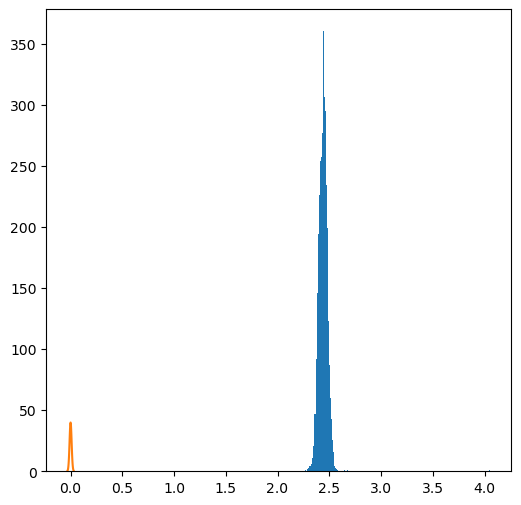

In [101]:
LED = "CP41B LED"
fig_type = "SSOCF"
Path = "C:/Users/albar/Desktop/IITM_QRNG/iitm_qrng_repos/QRNG_Correlation_Analysis/Raw_Corr/TLHG/MIF"

mean = []
var = []
Exposure = []
for i in range(715,1000,1000):
    rows, xxx = Loading_CSV(Path + str(i) + "MIFcorrelations1830.csv")
    mean.append(m)
    var.append(v)
    Exposure.append(i)
    print(np.var(rows))
    plt.hist(reduce(add ,rows), bins=200)
mu = 0 # mean
sigma = 0.01 # standard deviation
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

plt.plot(x, y)